In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
df  = pd.read_csv("../../../data/telecom_churn.csv")

FileNotFoundError: File b'../../../data/telecom_churn.csv' does not exist

In [ ]:
df.head()

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


In [ ]:
df

In [ ]:
print (df.info())

In [ ]:
print (df.info())

In [ ]:
df['Churn'] = df['Churn'].astype('int64')

In [ ]:
df.sort_values(by='Total day charge', ascending=False).head()

In [ ]:
df.sort_values(by=['Total day charge','Churn'], ascending=False).head()

In [ ]:
df.apply(np.max)

In [ ]:
d = {'No' : False, 'Yes': True}
df['International plan'] = df['International plan'].map(d)
df.head()

In [16]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [17]:
df = pd.read_csv('../../../../data/video_games_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [18]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def f (x):
    try:
#         float(x)
        return float(x)
    except:
        return None
df['User_Score'] = df['User_Score'].apply(f)

In [20]:
mask = (df.Year_of_Release.isna() == False) 
mask &= (df.User_Count.isna() == False)
mask &= df.Critic_Count.isna() == False
df1 = df[mask]
df1['User_Score'] = df1.User_Score.astype('float64')
df1.Year_of_Release = df1.Year_of_Release.astype('int64')
df1['User_Count'] = df1.User_Count.astype('int64')
df1['Critic_Count'] = df1.Critic_Count.astype('int64')

In [21]:
df = df1


In [22]:
useful_cols = ['Name','Platform','Year_of_Release','Genre','Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count','Rating']
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


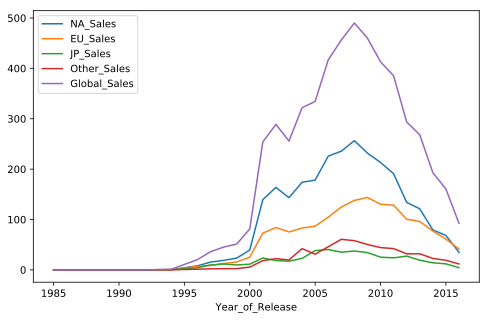

In [23]:
sales_df  = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

In [24]:
cols = ['Global_Sales','Critic_Score', 'Critic_Count','User_Score','User_Count']


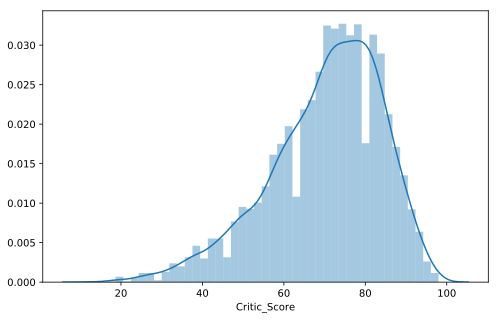

In [25]:
sns.distplot(df.Critic_Score)

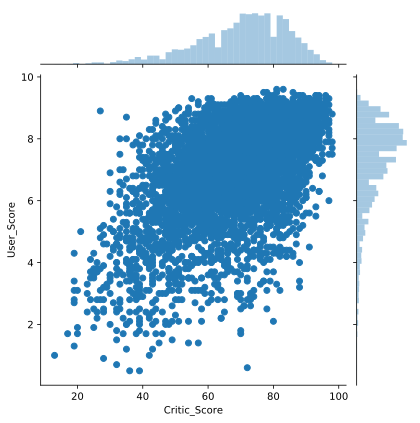

In [26]:
sns.jointplot(df.Critic_Score,df.User_Score)

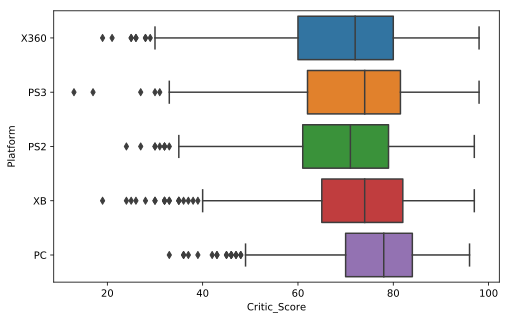

In [27]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y='Platform',x='Critic_Score', data=df[df.Platform.isin(top_platforms)], orient='h')

In [28]:
top_platforms

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

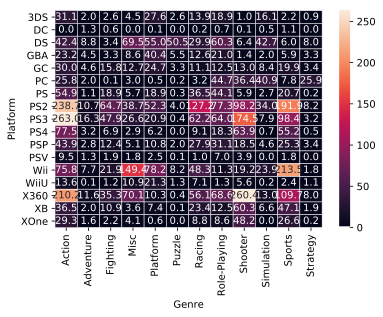

In [95]:
platform_genre_sales = df.pivot_table(
                                        index='Platform', 
                                        columns='Genre', 
                                        values='Global_Sales', 
                                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5)

In [103]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [114]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)

year_df.columns = ['Global_Sales', 'Number_of_Games']

years_df

trace0 = go.Scatter(
    x=years_df.index,
    y=year_df.Global_Sales,
    name='Global_Sales')

trace1 = go.Scatter(x=years_df.index,
                   y=years_df.Name,
                   name='Number of games released')

data = [trace0, trace1]
layout = {'title' : 'Statistics of video games'}

flg = go.Figure(data=data, layout=layout)
iplot(flg, show_link=False)

In [117]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)

platforms_df_columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Name,
    name='Number of games released'
)

data = [trace0,trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platforms'}}

flg = go.Figure(data=data, layout=layout)
iplot(flg, show_link=False)

In [119]:
data = []
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre==genre].Critic_Score, name=genre))
    
iplot(data, show_link=False)